# Load data

## Imports

In [1]:
# %env CUDA_VISIBLE_DEVICES=-1  # for CPU

# Import necessary libraries
import os
import urllib.request
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# check GPUs available

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("GPU Details:")
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
GPU Details:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## load and prepair data

In [3]:
# Function to download and extract the CIFAR-10 dataset
def download_and_extract_cifar10(destination_folder="data"):
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    filename = os.path.join(destination_folder, "cifar-10-python.tar.gz")

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    if not os.path.exists(filename):
        print("Downloading CIFAR-10 dataset...")
        urllib.request.urlretrieve(url, filename)
        print("Download complete.")

    with tarfile.open(filename, "r:gz") as tar:
        print("Extracting CIFAR-10 dataset...")
        tar.extractall(path=destination_folder)
        print("Extraction complete.")

# Call the function to download and extract the dataset
download_and_extract_cifar10()

# Load the CIFAR-10 dataset through TensorFlow
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Print the shapes of the data arrays
print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

Extracting CIFAR-10 dataset...
Extraction complete.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 10)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 10)


## See data

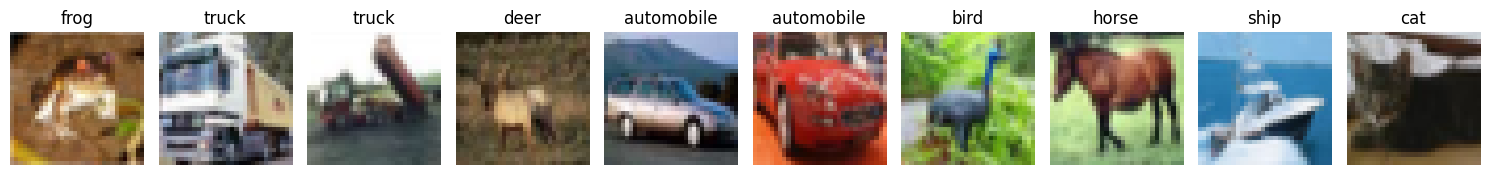

In [4]:
# Visualize some sample images from the training set
def plot_sample_images(x, y, classes, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 15))
    axes = axes.flatten()
    for i in range(num_samples):
        axes[i].imshow(x[i])
        axes[i].set_title(classes[np.argmax(y[i])])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Visualize the first 10 images from the training set
plot_sample_images(x_train, y_train, class_names)

# Build model

## Model

In [5]:
# Build the model
model = tf.keras.models.Sequential([
    # First convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 10 output neurons for 10 classes
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

## Train the model

In [7]:
# Train the model
print(f'\nMODEL TRAINING:')
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


MODEL TRAINING:
Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4472 - accuracy: 0.4743 - val_loss: 1.1365 - val_accuracy: 0.5937
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0525 - accuracy: 0.6271 - val_loss: 0.9509 - val_accuracy: 0.6671
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8755 - accuracy: 0.6951 - val_loss: 0.9179 - val_accuracy: 0.6801
Epoch 4/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7642 - accuracy: 0.7306 - val_loss: 0.8285 - val_accuracy: 0.7112
Epoch 5/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6667 - accuracy: 0.7649 - val_loss: 0.8628 - val_accuracy: 0.7099
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5906 - accuracy: 0.7927 - val_loss: 0.8490 - val_accuracy: 0.7212
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5209 - accuracy: 0.8164 - val_loss

# Evaluating and checking the result

In [8]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(x_test, y_test)


MODEL EVALUATION:
313/313 [==============================] - 2s 5ms/step - loss: 1.8086 - accuracy: 0.7159


Text(0.5, 1.0, 'Training and validation loss')

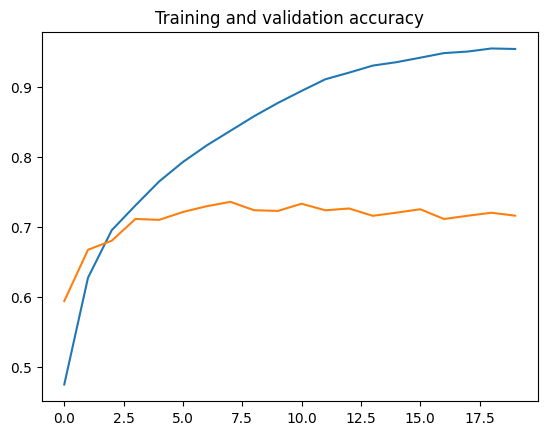

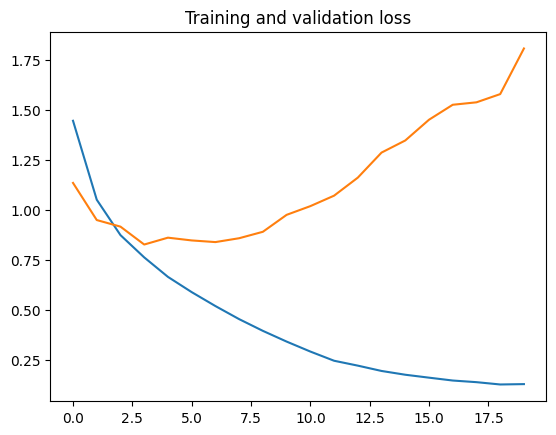

In [9]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )